# get_border

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
ps.visualization.set_mpl_style()

## Create variables

In [2]:
shape = [500, 500]

#default values:
thickness = 1
mode = 'edges'
return_indices = False

## Apply tool

### thickness

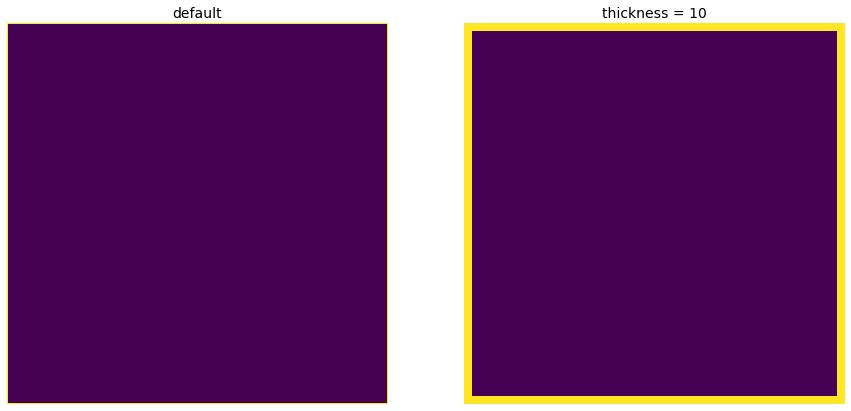

In [3]:
im = ps.tools.get_border(shape = shape, thickness = thickness, mode = mode, return_indices = return_indices )
im2 =ps.tools.get_border(shape = shape, thickness = 10, mode = mode, return_indices = return_indices )

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].axis(False)
ax[0].imshow(im) 
ax[0].set_title('default')
ax[1].axis(False)
ax[1].imshow(im2)
ax[1].set_title('thickness = 10');

### mode

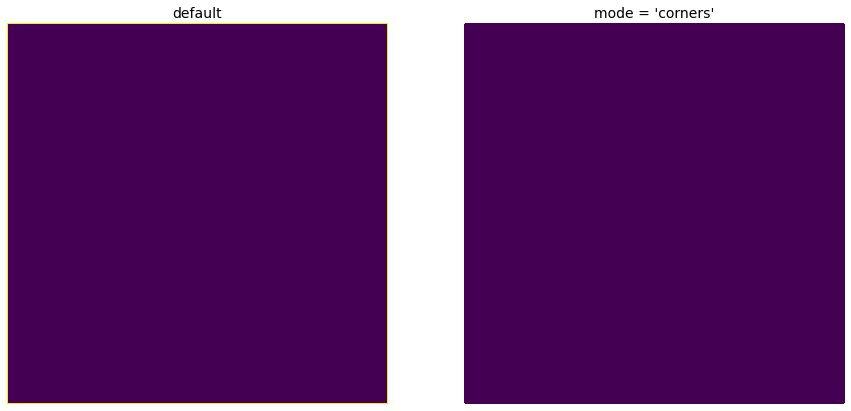

In [4]:
im = ps.tools.get_border(shape = shape, thickness = thickness, mode = mode, return_indices = return_indices )
im2 =ps.tools.get_border(shape = shape, thickness = thickness, mode = 'corners', return_indices = return_indices )

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].axis(False)
ax[0].imshow(im) 
ax[0].set_title('default')
ax[1].axis(False)
ax[1].imshow(im2)
ax[1].set_title("mode = 'corners'");

### return_indices

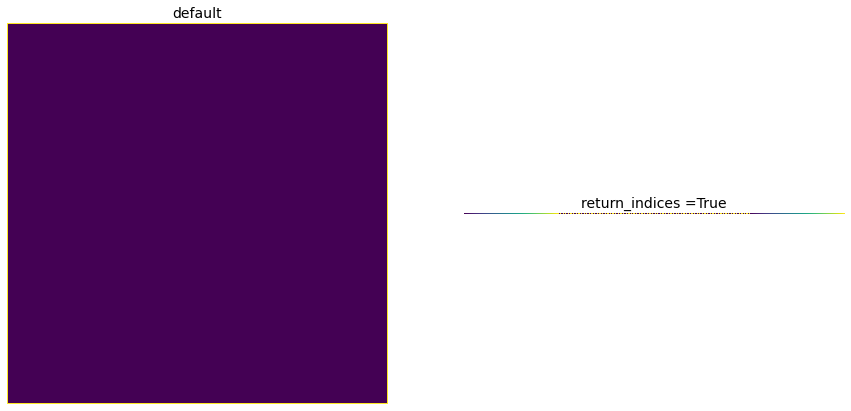

In [5]:
im = ps.tools.get_border(shape = shape, thickness = thickness, mode = mode, return_indices = return_indices )
im2 =ps.tools.get_border(shape = shape, thickness = thickness, mode = mode, return_indices =True)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].axis(False)
ax[0].imshow(im) 
ax[0].set_title('default')
ax[1].axis(False)
ax[1].imshow(im2)
ax[1].set_title('return_indices =True');